In [18]:
import os

import pandas as pd
import numpy as np
import datetime as dict

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Functions
----

In [19]:
# Check dew point

def calc_dew_point(temp_series, rh_series):
    b = 17.625
    c = 243.04

    dew_point = []
    for i in range(len(temp_series)):
        gamma = np.log((rh_series.iloc[i]/100)) + (b*temp_series.iloc[i])/(c+temp_series.iloc[i])
        dp = (c * gamma) / (b - gamma)

        dew_point.append(dp)

    return dew_point

# Main
----

## Data set up

In [81]:
df_path = "/Users/patmccornack/Documents/ucsb_fog_project/data/csv/SCI_POZO_SM02.csv"
df = pd.read_csv(df_path)
df = df[['soil-moisture-average-vwc-100-veg-avg',
       'soil-moisture-average-vwc-250-veg-avg',
       'soil-moisture-average-vwc-50-veg-avg',
       'soil-moisture-average-vwc-750-veg-avg']]
df.describe()

,soil-moisture-average-vwc-100-veg-avg,soil-moisture-average-vwc-250-veg-avg,soil-moisture-average-vwc-50-veg-avg,soil-moisture-average-vwc-750-veg-avg
count,74301.00,74301.00,74301.00,74301.00
mean,-0.15,-0.07,-0.17,-0.04
std,0.13,0.16,0.14,0.15
min,-0.41,-0.42,-0.43,-0.38
25%,-0.27,-0.19,-0.29,-0.15
50%,-0.18,-0.09,-0.20,-0.06
75%,-0.05,0.03,-0.07,0.05
max,0.33,0.51,0.32,0.53


In [83]:
# Use only the 'soil' data 
df_path = "/Users/patmccornack/Documents/ucsb_fog_project/data/csv/SCI_POZO_SM02_vwc_soil.csv"
df = pd.read_csv(df_path)
df.columns

Index(['Time', 'SCI Pozo SM02 Fog Harp ml',
       'SCI Pozo SM02 Rainfall Sum Rain_mm_Tot mm',
       'SCI Pozo SM02 Soil Moisture Average VWC_100_soil_Avg Dimensionless',
       'SCI Pozo SM02 Soil Moisture Average VWC_1500_soil_Avg Dimensionless',
       'SCI Pozo SM02 Soil Moisture Average VWC_250_soil_Avg Dimensionless',
       'SCI Pozo SM02 Soil Moisture Average VWC_50_soil_Avg Dimensionless',
       'SCI Pozo SM02 Soil Moisture Average VWC_750_soil_Avg Dimensionless'],
      dtype='object')

In [93]:
# Use only the 'soil' data 
df_path = "/Users/patmccornack/Documents/ucsb_fog_project/data/csv/SCI_POZO_SM02_vwc_soil.csv"
df_og = pd.read_csv(df_path)

vwc_col_names = ['time', 'vwc_10cm', 'vwc_150cm', 'vwc_25cm',
              'vwc_5cm', 'vwc_75cm']
precip_col_names = ['time', 'fog', 'rainfall']

df_vwc = df_og[['Time',
       'SCI Pozo SM02 Soil Moisture Average VWC_100_soil_Avg Dimensionless',
       'SCI Pozo SM02 Soil Moisture Average VWC_1500_soil_Avg Dimensionless',
       'SCI Pozo SM02 Soil Moisture Average VWC_250_soil_Avg Dimensionless',
       'SCI Pozo SM02 Soil Moisture Average VWC_50_soil_Avg Dimensionless',
       'SCI Pozo SM02 Soil Moisture Average VWC_750_soil_Avg Dimensionless']]

df_precip = df_og[['Time', 'SCI Pozo SM02 Fog Harp ml',
       'SCI Pozo SM02 Rainfall Sum Rain_mm_Tot mm',]]

# Rename columns
df_vwc.columns = vwc_col_names
df_precip.columns = precip_col_names

# Cast time to datetime
df_vwc['time'] = pd.to_datetime(df_vwc['time'])
df_precip['time'] = pd.to_datetime(df_precip['time'])


/var/folders/77/txzkwfd92_q42s0qflv4nbh00000gn/T/ipykernel_1904/1587035186.py:24: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_vwc['time'] = pd.to_datetime(df_vwc['time'])
/var/folders/77/txzkwfd92_q42s0qflv4nbh00000gn/T/ipykernel_1904/1587035186.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vwc['time'] = pd.to_datetime(df_vwc['time'])
/var/folders/77/txzkwfd92_q42s0qflv4nbh00000gn/T/ipykernel_1904/1587035186.py:25: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format

In [94]:
# Check NA and drop
print(f"NA Counts: \n{df_og.isna().sum()}")
#df_og.dropna(inplace=True)

NA Counts: 
Time                                                                       0
SCI Pozo SM02 Fog Harp ml                                              42016
SCI Pozo SM02 Rainfall Sum Rain_mm_Tot mm                                  4
SCI Pozo SM02 Soil Moisture Average VWC_100_soil_Avg Dimensionless         4
SCI Pozo SM02 Soil Moisture Average VWC_1500_soil_Avg Dimensionless       10
SCI Pozo SM02 Soil Moisture Average VWC_250_soil_Avg Dimensionless         4
SCI Pozo SM02 Soil Moisture Average VWC_50_soil_Avg Dimensionless          4
SCI Pozo SM02 Soil Moisture Average VWC_750_soil_Avg Dimensionless         4
dtype: int64


## Initial Soil Moisture Exploration
Since we have negative values in the veg vmc data, we just look at the soil data for now.

In [97]:
df_vwc_daily = df_vwc.copy().set_index('time').resample("D").mean()
df_precip_daily = df_precip.copy().set_index('time').resample("D").sum()

,vwc_10cm,vwc_150cm,vwc_25cm,vwc_5cm,vwc_75cm
time,,,,,
2020-10-20,0.16,0.26,0.21,0.09,0.31
2020-10-21,0.16,0.26,0.21,0.09,0.31
2020-10-22,0.16,0.25,0.21,0.09,0.31
2020-10-23,0.16,0.26,0.21,0.09,0.31
2020-10-24,0.16,0.26,0.21,0.08,0.31


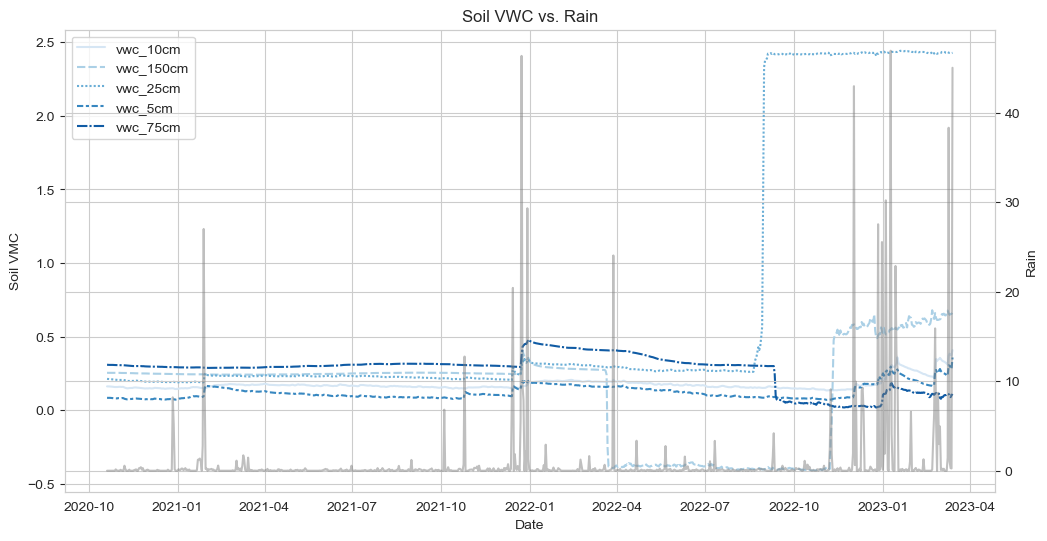

In [129]:
fig, ax = plt.subplots(figsize=(12,6))
ax2 = ax.twinx()

sns.lineplot(data=df_vwc_daily,
             palette="Blues",
             ax=ax)
sns.lineplot(data=df_precip_daily['rainfall'],
             color='grey',
             alpha=0.5,
             ax=ax2)

ax.set(xlabel='Date',
       ylabel='Soil VMC',
       title='Soil VWC vs. Rain')

ax2.set(ylabel='Rain')

plt.show()

## 2021 Water Year

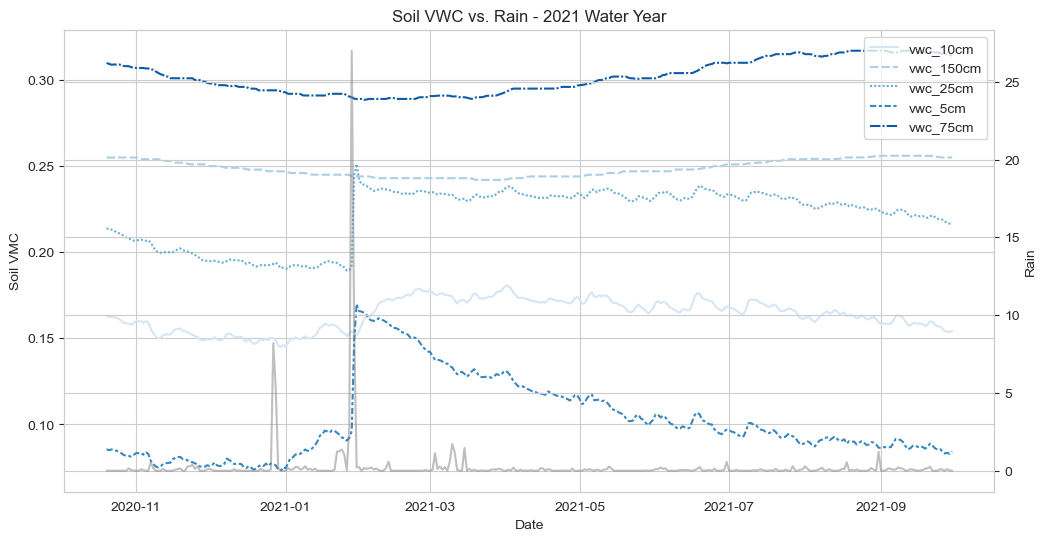

In [140]:
df_vwc_daily_subset = df_vwc_daily['10/01/20':'09/30/21']
df_precip_daily_subset = df_precip_daily['10/01/20':'09/30/21']

fig, ax = plt.subplots(figsize=(12,6))
ax2 = ax.twinx()

sns.lineplot(data=df_vwc_daily_subset,
             palette="Blues",
             ax=ax)
sns.lineplot(data=df_precip_daily_subset['rainfall'],
             color='grey',
             alpha=0.5,
             ax=ax2)

ax.set(xlabel='Date',
       ylabel='Soil VMC',
       title='Soil VWC vs. Rain - 2021 Water Year')

ax2.set(ylabel='Rain')
ax.legend(loc='upper right')

plt.show()

## 2022 Water Year

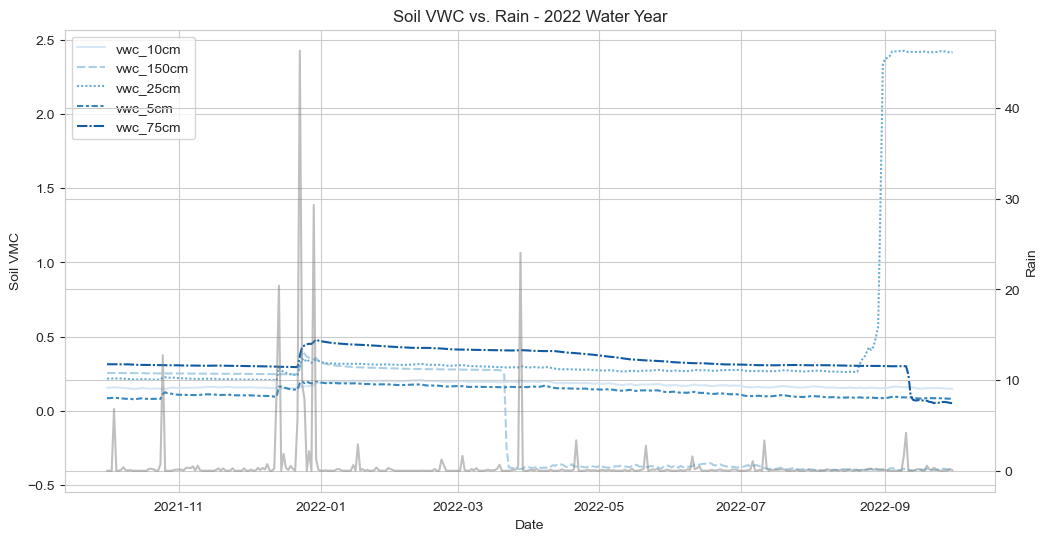

In [139]:
df_vwc_daily_subset = df_vwc_daily['10/01/21':'09/30/22']
df_precip_daily_subset = df_precip_daily['10/01/21':'09/30/22']

fig, ax = plt.subplots(figsize=(12,6))
ax2 = ax.twinx()

sns.lineplot(data=df_vwc_daily_subset,
             palette="Blues",
             ax=ax)
sns.lineplot(data=df_precip_daily_subset['rainfall'],
             color='grey',
             alpha=0.5,
             ax=ax2)

ax.set(xlabel='Date',
       ylabel='Soil VMC',
       title='Soil VWC vs. Rain - 2022 Water Year')

ax2.set(ylabel='Rain')
ax.legend(loc='upper left')

plt.show()